<a href="https://colab.research.google.com/github/mariayekwam/202055202013-Maria/blob/master/DL_Klasifikasi_Jenis_Buah_Rambutan_M6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files

files.upload()
     

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariayekwam","key":"755ccb2fa33b1410a77389342f764af5"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 May 11 04:09 kaggle.json


In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/
     

!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets list
     

ref                                                                title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                              Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          11573        299  1.0              
asahu40/walmart-data-analysis-and-forcasting                       Walmart Data Analysis and Forcasting              122KB  2023-04-26 07:07:03           1652         37  1.0              
ahmedshahriarsakib/usa-real-estate-dataset                         USA Real Estate Dataset                             1MB  2023-04-30 03:51:36           1332         36  1.0              
iammustafatz/diabetes-prediction-dataset               

In [7]:
!kaggle datasets download -d mariayekwam/deep-learning-klasifikasi-jenis-buah-rambutan

 81% 6.00M/7.38M [00:00<00:00, 62.6MB/s]
100% 7.38M/7.38M [00:00<00:00, 71.2MB/s]


In [8]:
!unzip deep-learning-klasifikasi-jenis-buah-rambutan.zip

Archive:  deep-learning-klasifikasi-jenis-buah-rambutan.zip
  inflating: buah rambutan/buah rambuan kuning/download (1).jpg  
  inflating: buah rambutan/buah rambuan kuning/download (10).jpg  
  inflating: buah rambutan/buah rambuan kuning/download (11).jpg  
  inflating: buah rambutan/buah rambuan kuning/download (12).jpg  
  inflating: buah rambutan/buah rambuan kuning/download (13).jpg  
  inflating: buah rambutan/buah rambuan kuning/download (14).jpg  
  inflating: buah rambutan/buah rambuan kuning/download (15).jpg  
  inflating: buah rambutan/buah rambuan kuning/download (16).jpg  
  inflating: buah rambutan/buah rambuan kuning/download (17).jpg  
  inflating: buah rambutan/buah rambuan kuning/download (2).jpg  
  inflating: buah rambutan/buah rambuan kuning/download (3).jpg  
  inflating: buah rambutan/buah rambuan kuning/download (4).jpg  
  inflating: buah rambutan/buah rambuan kuning/download (5).jpg  
  inflating: buah rambutan/buah rambuan kuning/download (6).jpg  
  inflat

In [9]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [12]:
dataset_path = Path(r'/content/buah rambutan')
file_path = list(dataset_path.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [13]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/content/buah rambutan/buah rambuan kuning/ima...,buah rambuan kuning
1,/content/buah rambutan/buah rambuan kuning/ima...,buah rambuan kuning
2,/content/buah rambutan/buah rambuan kuning/ima...,buah rambuan kuning
3,/content/buah rambutan/buah rambuan kuning/ima...,buah rambuan kuning
4,/content/buah rambutan/buah rambuan kuning/ima...,buah rambuan kuning


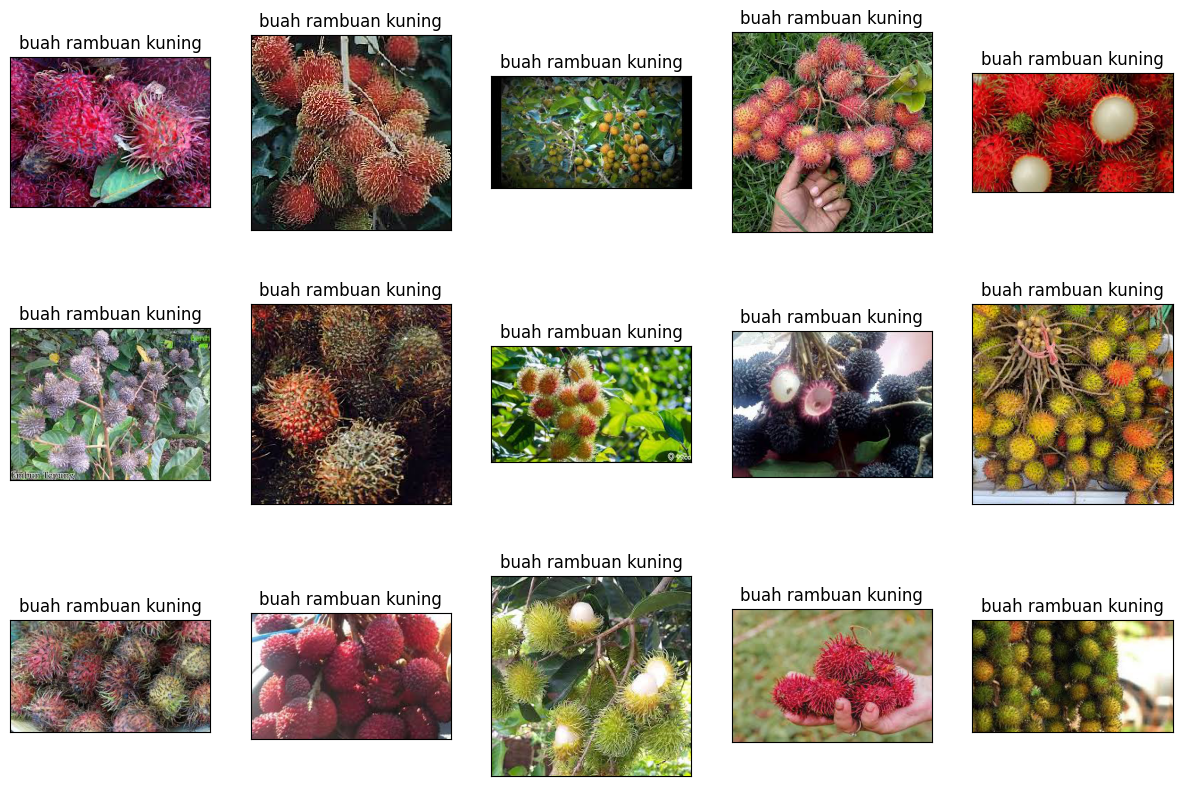

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

In [15]:
df.label.value_counts()
     

buah rambuan kuning     100
buah rambutan aceh      100
buah rambutan binjai     95
Name: label, dtype: int64

In [16]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

buah rambuan kuning     100
buah rambutan aceh      100
buah rambutan binjai     95
Name: label, dtype: int64

In [17]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [18]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (164, 2)
Shape of test data (89, 2)
Shape of validation data (42, 2)


In [20]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 164 validated image filenames belonging to 3 classes.
Found 89 validated image filenames belonging to 3 classes.
Found 42 validated image filenames belonging to 3 classes.


In [21]:
input_shape = (200, 200, 3)

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [50]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
history = model.fit(train, batch_size= 512, validation_data=val, epochs=5, callbacks=callback)

Epoch 1/5
6/6 [==============================] - 18s 3s/step - loss: 0.9978 - accuracy: 0.4573 - val_loss: 1.0199 - val_accuracy: 0.4286
Epoch 2/5
6/6 [==============================] - 15s 2s/step - loss: 0.9886 - accuracy: 0.4939 - val_loss: 1.0031 - val_accuracy: 0.5714
Epoch 3/5
6/6 [==============================] - 15s 3s/step - loss: 0.9904 - accuracy: 0.4634 - val_loss: 1.0315 - val_accuracy: 0.5000
Epoch 4/5
6/6 [==============================] - 15s 2s/step - loss: 0.9851 - accuracy: 0.4695 - val_loss: 1.0163 - val_accuracy: 0.5238
Epoch 5/5
6/6 [==============================] - 15s 2s/step - loss: 0.9600 - accuracy: 0.5000 - val_loss: 0.9537 - val_accuracy: 0.5238


In [51]:
model.save('model-1.h5')

In [52]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

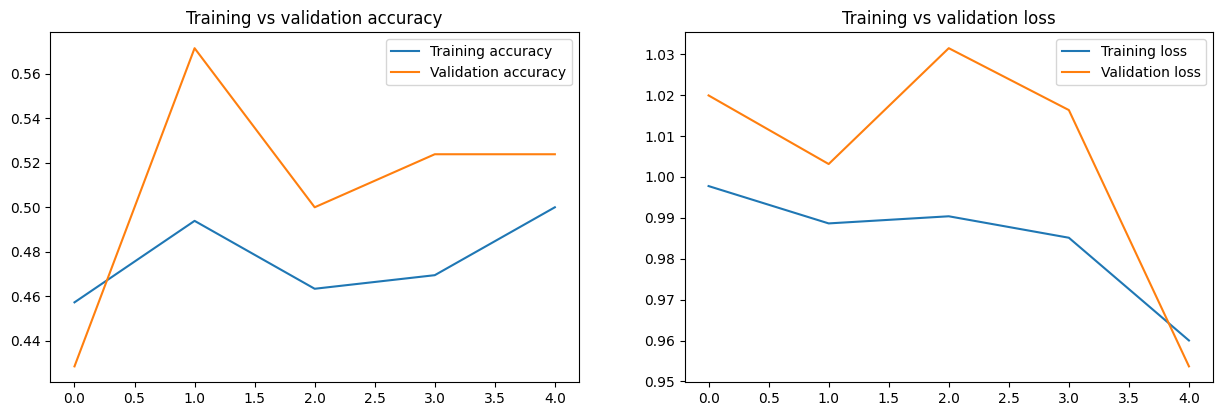

In [53]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()

In [54]:
pred = model.predict(test)

3/3 [==============================] - 2s 591ms/step


In [55]:
pred = np.argmax(pred, axis=1)

In [56]:
labels = train.class_indices

In [57]:
labels

{'buah rambuan kuning': 0, 'buah rambutan aceh': 1, 'buah rambutan binjai': 2}

In [58]:
labels = dict((v,k) for k, v in labels.items())

In [59]:
labels

{0: 'buah rambuan kuning', 1: 'buah rambutan aceh', 2: 'buah rambutan binjai'}

In [60]:
y_pred = [labels[k] for k in pred]

In [61]:
print(classification_report(x_test.label, y_pred))

                      precision    recall  f1-score   support

 buah rambuan kuning       0.47      0.50      0.49        34
  buah rambutan aceh       0.42      0.61      0.50        28
buah rambutan binjai       0.38      0.19      0.25        27

            accuracy                           0.44        89
           macro avg       0.43      0.43      0.41        89
        weighted avg       0.43      0.44      0.42        89



In [62]:
print(confusion_matrix(x_test.label, y_pred))

[[17 12  5]
 [ 8 17  3]
 [11 11  5]]


In [63]:
test_accuracy = model.evaluate(test)[1]

3/3 [==============================] - 2s 592ms/step - loss: 1.2233 - accuracy: 0.4157
